<a href="https://colab.research.google.com/github/LucasMonteiroBastos/Projeto_Analise_Censo/blob/main/CENSO_PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O projeto busca entender, com base na informações se uma pessoa ganha ou não acima de 50k por mês.


In [1]:
# Libs necessarias 

# Modelagem
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
# Carregando os Dados
baseDeDadosCenso = pd.read_csv('/content/census.csv')

In [3]:
# Lendos os Dados
baseDeDadosCenso

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Analisando os valores de Estatisfica
baseDeDadosCenso.describe()

# ---MEDIA---
# (age)idade: 38 anos  
# (education-num)anos de estudo: 10 anos   
# (capital-gain	)ganho de capital: 1077   
# (capital-loos)perda de capital: 87                       
# (hour-per-week)horas trabalhadas: 40 horas

#---MIN---MAX
# (age): 17 - 90
# (education-num): 1 - 16
# (hour-per-week): 1 - 99


,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Verificando valores faltantes
baseDeDadosCenso.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [6]:
# Verificando o valor da classe
np.unique(baseDeDadosCenso['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

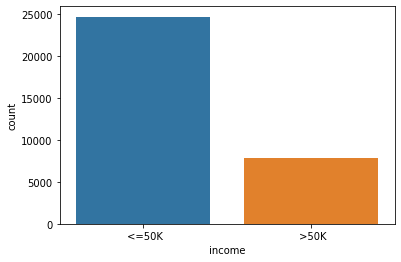

In [7]:
# Verificando a distribuição
sns.countplot(x= baseDeDadosCenso['income']);

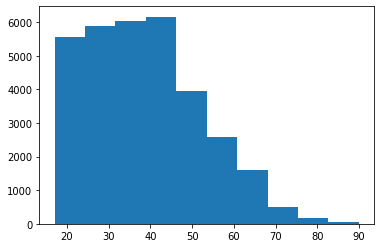

In [8]:
# Analisando a distribuição das idades
plt.hist(x= baseDeDadosCenso['age']);

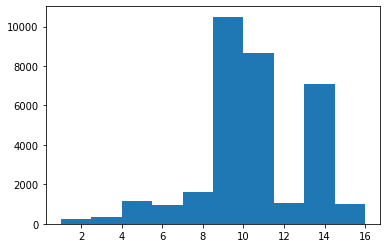

In [9]:
# Distrituição de numeros de anos estudados
plt.hist(x= baseDeDadosCenso['education-num']);

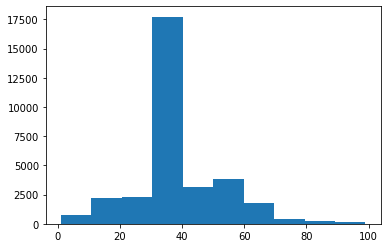

In [10]:
# Distribuição de horas trabalhadas por semana
plt.hist(x= baseDeDadosCenso['hour-per-week']);

In [11]:
# Distribuição de Tipo de Serviço
grafico = px.treemap(baseDeDadosCenso, path=['workclass'])
grafico.show()

In [12]:
grafico = px.treemap(baseDeDadosCenso, path=['occupation', 'age'])
grafico.show()

In [13]:
# Categorias paralelas
grafico = px.parallel_categories(baseDeDadosCenso, dimensions=['education', 'income'])
grafico.show()

In [14]:
# Divisão em previsores e class
# X previsor
X_census = baseDeDadosCenso.iloc[:, 0:14].values

In [15]:
# Y classe
y_census = baseDeDadosCenso.iloc[:, 14].values

Tratamento de atributos categorios (Transformar String em Numericos)

In [16]:
# Libs sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [18]:
# variavel que ta recebendo uma instacia de LabelEncoder()
label_encoder_test = LabelEncoder()

# varialvel que ta recebendo a transformação de string para numero ( recebendo o parametro X_census#)
teste = label_encoder_test.fit_transform(X_census[:,1])

In [19]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [20]:
# transformando todos de forma unitaria
label_encoder_worclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [21]:
# transformando
X_census[:, 1] = label_encoder_worclass.fit_transform(X_census[:,1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:,13])

In [22]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
# transformando as colunas
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')



In [24]:
  # transformando as colunas

  X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [25]:
# Escalonamento dos atributos: --->> Deixar os valores na mesma escala
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [26]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [27]:
X_census.shape

(32561, 108)

In [28]:
  from sklearn.model_selection import train_test_split

In [29]:
# Dividindo as bases, X Treino e X Teste / y treino e y teste --->> 85% treino 15% teste
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

Salvando as variaveis em disco

In [30]:
import pickle

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

In [31]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento

In [32]:
# Verificando as variaveis X preditoras e y class
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [33]:
  # analisando X treino e y teste
  X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [34]:
# importando o algoritmo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# criando o algoritmo naive bayes
naive_census = GaussianNB()

# fazendo o treinamento
naive_census.fit(X_census_treinamento, y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [35]:
# comparando com as respostas reais dessa variavel "y_census_teste"
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [36]:
# importando a biblioteca de acuracia
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# calculando a accuracia -->> taxa de acertos
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

In [38]:
# matrix de confusão
from sklearn.metrics import confusion_matrix

0.4767656090071648

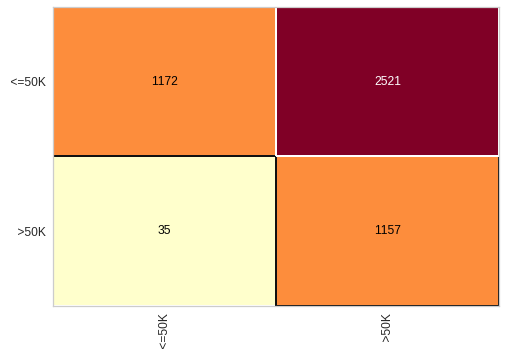

In [39]:
# importando ConfusionMatrix
from yellowbrick.classifier import ConfusionMatrix

# criando a matrix
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [40]:
# visualizando o classification reporte
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



CRIANDO O ALGORITMO ARVORE DE DECISÃO

In [41]:
# implementando o algoritmo
from sklearn.tree import DecisionTreeClassifier

In [42]:
# passando x treino e y teste
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento,  y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
# fazendo as previsoes
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [44]:
# fazendo o comparativo
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [45]:
# calcurando a taxa de acerto
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# taxa de acerto 
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

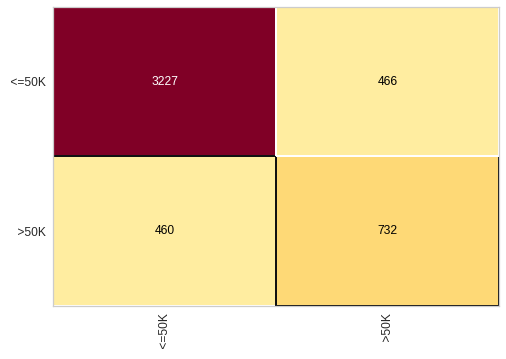

In [47]:
# implementando a matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [48]:
# visualizando o classfication reporte
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



CRIANDO O ALGORITMO RANDOM FOREST

In [49]:
# implementando
from sklearn.ensemble import RandomForestClassifier

In [50]:
# criando o random forest
random_forest_census = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

In [51]:
# fazendo o treinamento
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [52]:
# previsoes
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [53]:
# respostas reais
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [54]:
# metricas
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.847697031729785

0.847697031729785

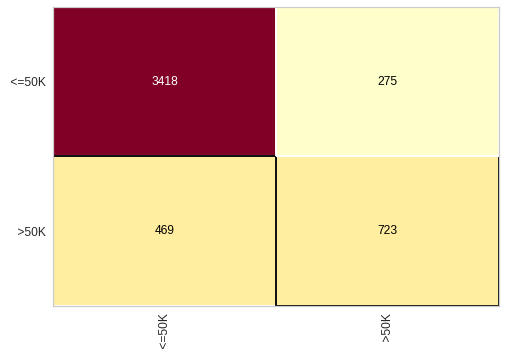

In [55]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [56]:
# classification reportes
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.72      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



IMPLEMENTANDO O ALGORITMO KNN

In [57]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [58]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [59]:
# import o KNN
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# fazendo o treinamento
knn_census = KNeighborsClassifier(n_neighbors=5)
# passando X previsoes  e y class
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier()

In [61]:
# previsoes
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [62]:
# resultado real
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

CALCULANDO A ACURACIA


In [63]:
# taxa de acerto
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8223132036847492

MATRI DE CONFUSÃO

0.8223132036847492

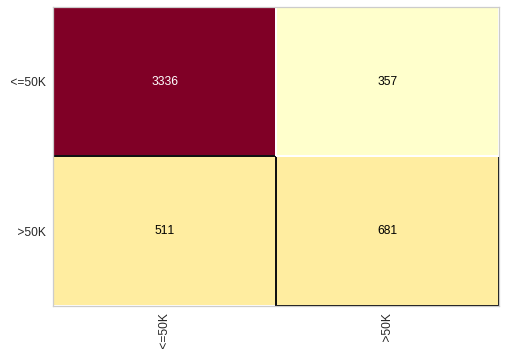

In [64]:
# matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste) 

ANALISANDO O CLASSFICATION REPORTE

In [65]:
print(classification_report(y_census_teste, previsoes)) 

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



IMPLEMENTANDO O ALGORITMO: REGRESSÃO LOGISTICA

In [66]:
# biblioteca regressão logistica
from sklearn.linear_model import LogisticRegression
logistic_census = LogisticRegression(random_state=1)

In [67]:
# fazendo o treinamento com X treino e y teste
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [68]:
# fazendo a predição
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [69]:
# valor real
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [70]:
# comparação entre o valor predito e o valor real

# taxa de acerto
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.849539406345957

0.849539406345957

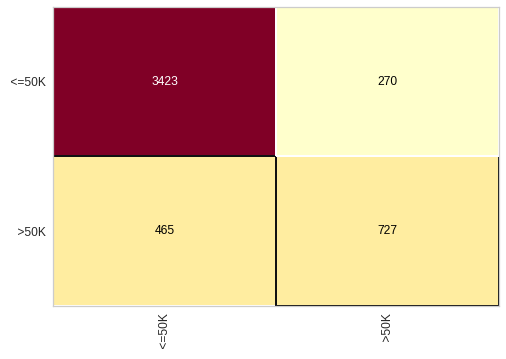

In [71]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [72]:
# classfitication report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



IMPLEMTANDNO O ALGORITMO: SUPORTE VECTOR MACHINE (SVM)

In [73]:
# importando a lib
from sklearn.svm import SVC

In [74]:
# implementando o algoritmo
svm_census = SVC(kernel='rbf', random_state=1)

# fazendo o treino
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(random_state=1)

In [75]:
# fazendo previsoes
previsoes = svm_census.predict(X_census_teste)

In [76]:
  # analisando o valor real
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [77]:
# taxa de acerto 
from sklearn.metrics import accuracy_score, classification_report

# fazendo a comparação
accuracy_score(y_census_teste, previsoes)

0.8493346980552713

0.8493346980552713

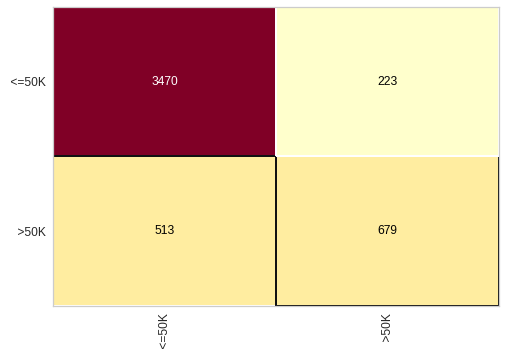

In [78]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [79]:
# classification report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.57      0.65      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.75      0.78      4885
weighted avg       0.84      0.85      0.84      4885



IMPLEMENTANDO A REDE NEURAL

In [93]:
# lib da rede neural
from sklearn.neural_network import MLPClassifier

# instanciando o algoritmo
rede_neural_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.0000100, solver='adam', activation = 'relu', hidden_layer_sizes=(4,4))

# fazendo o treinamento
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.50268042
Iteration 2, loss = 0.39256663
Iteration 3, loss = 0.35449198
Iteration 4, loss = 0.34092265
Iteration 5, loss = 0.33388142
Iteration 6, loss = 0.32919956
Iteration 7, loss = 0.32550182
Iteration 8, loss = 0.32258594
Iteration 9, loss = 0.31985084
Iteration 10, loss = 0.31772406
Iteration 11, loss = 0.31592795
Iteration 12, loss = 0.31438411
Iteration 13, loss = 0.31310295
Iteration 14, loss = 0.31220648
Iteration 15, loss = 0.31144554
Iteration 16, loss = 0.31074819
Iteration 17, loss = 0.31021765
Iteration 18, loss = 0.30978728
Iteration 19, loss = 0.30937262
Iteration 20, loss = 0.30903680
Iteration 21, loss = 0.30873906
Iteration 22, loss = 0.30835823
Iteration 23, loss = 0.30805832
Iteration 24, loss = 0.30793520
Iteration 25, loss = 0.30747010
Iteration 26, loss = 0.30741508
Iteration 27, loss = 0.30719086
Iteration 28, loss = 0.30706049
Iteration 29, loss = 0.30669702
Iteration 30, loss = 0.30663954
Iteration 31, loss = 0.30650628
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, tol=1e-05, verbose=True)

In [94]:
# fazendo a previsão
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [95]:
# valor real
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [96]:
# calculando a taxa de acerto
from sklearn.metrics import accuracy_score, classification_report

# acuracia
accuracy_score(y_census_teste, previsoes)

0.8454452405322416

0.8454452405322416

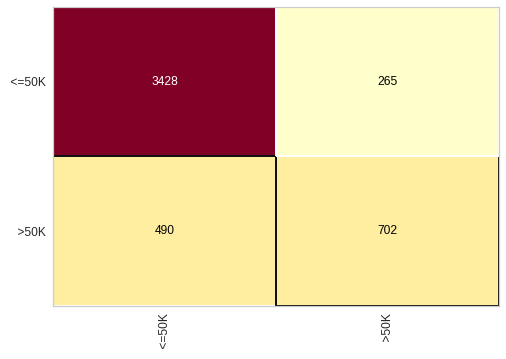

In [97]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [98]:
# classification report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      3693
        >50K       0.73      0.59      0.65      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

